

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Dataset  : TMDb movie data
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

Question : Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?

In [377]:

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pprint import pprint


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [378]:
# Load data
data = pd.read_csv('data/tmdb-movies.csv')
data.iloc[0]



id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action




### Data Cleaning

***Removing duplicate rows if any***

In [379]:
# frop duplicates
pprint("rows before removing duplicates.."+str(len(data)))
data.drop_duplicates(keep = 'first', inplace = True)
pprint("rows after removing duplicates.."+str(len(data)))

#df_new = data.dropna(axis=1,how='all') 
#len(df_new)




'rows before removing duplicates..10866'
'rows after removing duplicates..10865'


*** Removing rows who genres are empty***

In [380]:
dataWithGenres = data[~data['genres'].isnull()]
pprint("rows with genres.."+str(len(dataWithGenres)))
dataWithGenres.head()

'rows with genres..10842'


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


*** Removing rows whose budget and revenue are zero***

In [381]:
# replace zero to na
dataWithGenres[['budget', 'revenue']] = dataWithGenres[['budget', 'revenue']].replace(0, np.NAN)
#dataWithGenres.head()
# removing NAN
dataWithGenres.dropna(subset = ['budget', 'revenue'], inplace = True)
rows, col = dataWithGenres.shape
pprint("rows without zero revenue and budget.."+str(len(dataWithGenres)))


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


'rows without zero revenue and budget..3854'


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [382]:
dataWithGenres.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular?

Text(0.5,1,'genres vs movie count')

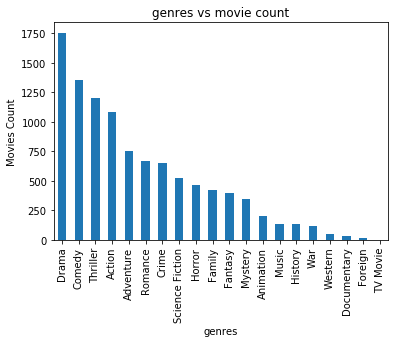

In [383]:

genr_arr = []


genres_data = dataWithGenres['genres'].str.cat(sep = '|')
genres_data_split = pd.Series(genres_data.split('|'))

groupedGenres = genres_data_split.value_counts(ascending = False)
groupedGenres.plot.bar()
plt.xlabel('genres')
#On y-axis 
plt.ylabel('Movies Count')
#Name of the graph
plt.title('genres vs movie count')





***Inference*** : As per the data calculated, movies with 'drama' genres   occupied the market. Drama is followed by comedy and thriller

### Which average budget of movies

In [384]:
dataWithGenres['budget'].mean()

37203696.954852104

***Inference***. The everage budget for a movie is 37203696.954852104

### Which movies gives high revenue

In [385]:
maxRevMovie = dataWithGenres.iloc[dataWithGenres['revenue'].argmax()]
maxRevMovie

id                                                                   9573
imdb_id                                                         tt0309377
popularity                                                       0.545907
budget                                                              5e+07
revenue                                                       2.61995e+07
original_title                                                 Blood Work
cast                    Clint Eastwood|Jeff Daniels|Anjelica Huston|Wa...
homepage                                                              NaN
director                                                   Clint Eastwood
tagline                    He's a heartbeat away from catching the killer
keywords                      houseboat|heart|investigation|police|ex-cop
overview                Still recovering from a heart transplant, a re...
runtime                                                               110
genres                                

In [386]:
### Average runtime of movies

In [387]:
dataWithGenres['runtime'].mean()

109.22029060716139

In [388]:
### Movies run time plot

Text(0.5,1,'Runtime of the movies')

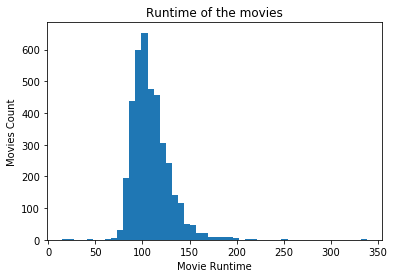

In [389]:
data_runtime = dataWithGenres['runtime']
plt.hist(data_runtime, bins=50)
plt.xlabel('Movie Runtime')
#On y-axis 
plt.ylabel('Movies Count')
#Name of the graph
plt.title('Runtime of the movies')

***Inference***. The histogram follows positively skewed one where most of the movie runtime falls around
 75 to 135.

Will print the statistics based on runtime

In [390]:
dataWithGenres['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

***Inference***. Based on runtime statistics, average runtime is 109 and it has standard deviation of 19

In [391]:
### Release year Vs Revenue

Text(0.5,1,'Release Year vs revenue')

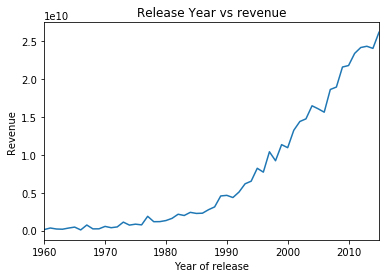

In [392]:
dataByYar = dataWithGenres.groupby('release_year')['revenue'].sum() 
dataByYar.plot.line()
plt.xlabel('Year of release')
#On y-axis 
plt.ylabel('Revenue')
#Name of the graph
plt.title('Release Year vs revenue')

***Inferenece*** : The maximum revenue is on 2015

In [393]:
dataByYar.describe()

count    5.600000e+01
mean     7.411147e+09
std      8.242757e+09
min      8.473669e+07
25%      7.454036e+08
50%      2.942177e+09
75%      1.353885e+10
max      2.620292e+10
Name: revenue, dtype: float64

###Runtime Vs revenue

Text(0.5,1,'runtime vs revenue')

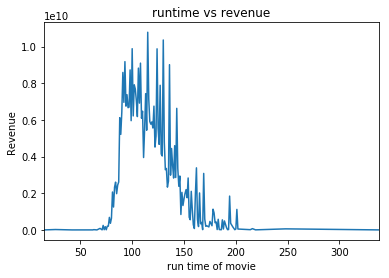

In [394]:
datarunRev = dataWithGenres.groupby('runtime')['revenue'].sum() 
datarunRev.plot.line()
plt.xlabel('run time of movie')
#On y-axis 
plt.ylabel('Revenue')
#Name of the graph
plt.title('runtime vs revenue')

***Inference*** : Based on the graph above, the graph is positively skewed where the revenue is contained by the runtime time. After runtime of 130.. the revenue is decreasing. 

### What kinds of properties are associated with movies that have high revenues?

In [395]:
#To find the paroperties that are associated with high revenues. We have to find the corrleation of data with revenues.
data.corr()



,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


As per the table above, revenue is more corrlated with vote_count with the correlation value of 0.79

***Inference***. Higher the value between columns , higher the correleation is.

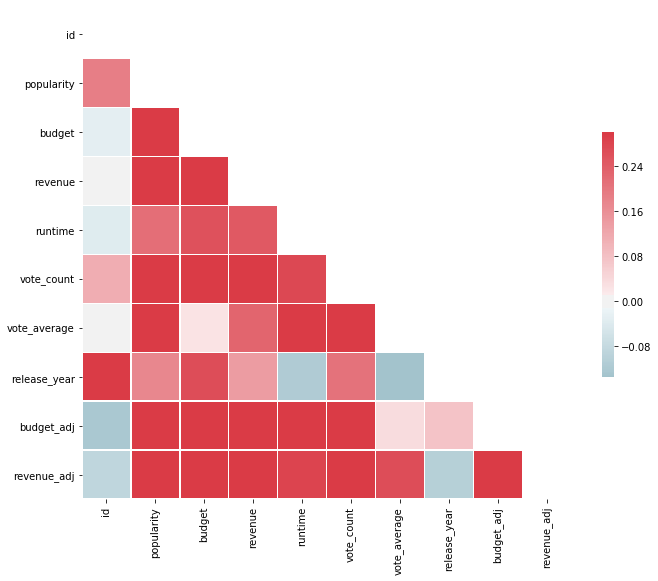

In [396]:
# Compute the correlation matrix
corr = dataWithGenres.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
          square=True, linewidths=.5, cbar_kws={"shrink": .5})




<a id='conclusions'></a>
## Conclusions


As per the data of movies, High revenue is associated with the following in the order it was associated.
1. Vote_count ( having correlation value of 79%). If the vote_count is high then obvious more people come and see the movie which in turns increase the revenue)
2. Budget ( having correlation value of 73%. Higher the budget is , higher the revenue of movie as per the dataset )
3. Popularity (having correlation value of 66.3%. Higher the popularity of movie is , higher the revenue of movie as per the dataset)

As per the analysis following are important to be considered
1. To get more revenue, the run time of movies should be aroung 109
2. The mean budget of all movies is 37203696. This is average amount to make a good revenue movie
2. As the years moves on, the revenue of movie increases based on the causation mention just above like vote_count, budget, popularity

Limitations :
1. The runtime measure is not shown whether it is second or minutes
2. The measure of budget/revenue are not shown.
3. Few invalid data/duplicate data's has been excluded from analysis. Not sure whether that affecet our analysis. We need to get that data corrected.